In [1]:
import pandas as pd

import numpy as np

import plotly.express as px

import CalculatedFieldSubroutines as cfs

from pandasgui import show

In [2]:
metadata_df = cfs.retrieve_metadata_df()

In [3]:
red_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Red' ][ 'groupMetadataID' ].tolist()

green_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Green' ][ 'groupMetadataID' ].tolist() 

blue_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Blue' ][ 'groupMetadataID' ].tolist()

In [4]:
red_route_combined_df_list = []

reference_red_route_best_pose_df = cfs.retrieve_gmID_topic( red_route_gmID_list[ 0 ], '/apollo/sensor/gnss/best/pose' )

for gmID in red_route_gmID_list:

    current_gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    current_gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.LatLonTotalStdDev( current_gmID_best_pose_df )

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_red_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    red_route_combined_df_list.append( current_gmID_combined_df )

#

green_route_combined_df_list = []

reference_green_route_best_pose_df = cfs.retrieve_gmID_topic( green_route_gmID_list[ 0 ], '/apollo/sensor/gnss/best/pose' )

for gmID in green_route_gmID_list:

    current_gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    current_gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.LatLonTotalStdDev( current_gmID_best_pose_df )

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_green_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    green_route_combined_df_list.append( current_gmID_combined_df )

#

blue_route_combined_df_list = []

reference_blue_route_best_pose_df = cfs.retrieve_gmID_topic( blue_route_gmID_list[ 0 ], '/apollo/sensor/gnss/best/pose' )

for gmID in blue_route_gmID_list:

    current_gmID_chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    current_gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    #

    current_gmID_chassis_df = current_gmID_chassis_df.sort_values( 'time' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( current_gmID_chassis_df )

    cfs.TernaryDrivingModeTransition( current_gmID_chassis_df )

    #

    cfs.LatLonTotalStdDev( current_gmID_best_pose_df )

    cfs.ProgressAlongRoute( current_gmID_best_pose_df, reference_blue_route_best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( current_gmID_chassis_df, current_gmID_best_pose_df )

    #

    current_gmID_combined_df = pd.merge( current_gmID_chassis_df, current_gmID_best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    blue_route_combined_df_list.append( current_gmID_combined_df )

In [5]:
red_route_combined_df_all = pd.concat( red_route_combined_df_list )

red_route_combined_df_all_disengagements = red_route_combined_df_all[ red_route_combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]

red_route_combined_df_all_disengagements[ 'TernaryDrivingModeTransition' ] = 'DE'

/tmp/ipykernel_129774/3307341471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_route_combined_df_all_disengagements[ 'TernaryDrivingModeTransition' ] = 'DE'


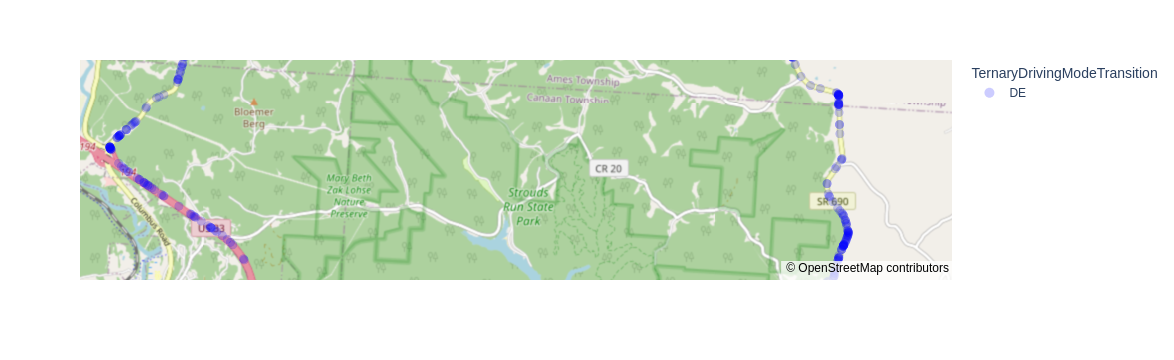

In [6]:
fig = px.scatter_mapbox(
                        red_route_combined_df_all_disengagements, 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'TernaryDrivingModeTransition',
                        hover_data = [ 'ProgressAlongRoute' ],
                        opacity = 1 / 5,
                        zoom = 12, 
                        height = 1000, 
                        mapbox_style = 'open-street-map',
                        color_discrete_map={
                                            'DE' : '#0000FF',
                                           }
                       )

fig.update_traces( marker = dict( size = 10 ) )

fig.show()

In [7]:
green_route_combined_df_all = pd.concat( green_route_combined_df_list )

green_route_combined_df_all_disengagements = green_route_combined_df_all[ green_route_combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]

green_route_combined_df_all_disengagements[ 'TernaryDrivingModeTransition' ] = 'DE'

/tmp/ipykernel_129774/2309197475.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



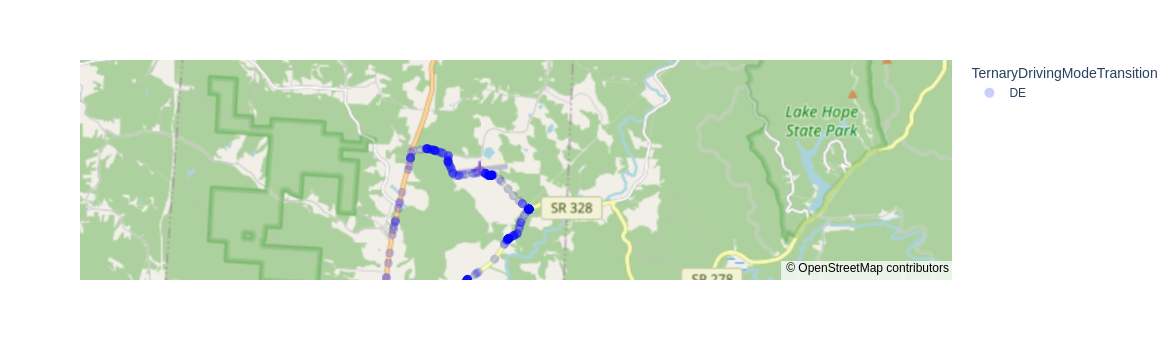

In [8]:
fig = px.scatter_mapbox(
                        green_route_combined_df_all_disengagements, 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'TernaryDrivingModeTransition',
                        hover_data = [ 'ProgressAlongRoute' ],
                        opacity = 1 / 5,
                        zoom = 12, 
                        height = 1000, 
                        mapbox_style = 'open-street-map',
                        color_discrete_map={
                                            'DE' : '#0000FF',
                                           }
                       )

fig.update_traces( marker = dict( size = 10 ) )

fig.show()

In [9]:
blue_route_combined_df_all = pd.concat( blue_route_combined_df_list )

blue_route_combined_df_all_disengagements = blue_route_combined_df_all[ blue_route_combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]

blue_route_combined_df_all_disengagements[ 'TernaryDrivingModeTransition' ] = 'DE'

/tmp/ipykernel_129774/2575423526.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



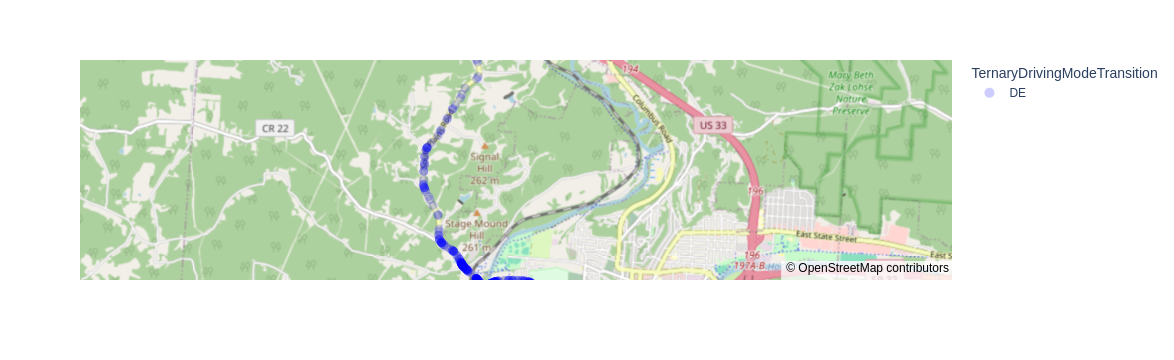

In [10]:
fig = px.scatter_mapbox(
                        blue_route_combined_df_all_disengagements, 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'TernaryDrivingModeTransition',
                        hover_data = [ 'ProgressAlongRoute' ],
                        opacity = 1 / 5,
                        zoom = 12, 
                        height = 1000, 
                        mapbox_style = 'open-street-map',
                        color_discrete_map={
                                            'DE' : '#0000FF',
                                           }
                       )

fig.update_traces( marker = dict( size = 10 ) )

fig.show()